# Irregular waves
By adding regular wave components with different wave amplitudes $\zeta_{a,i}$, wave frequencies $\omega_i$ and with arbitrary relative phase angle $\varepsilon_i$, we can construct irregular wave conditions as observed in realistic sea-states.
$$\zeta(t)=\sum_{i=1}^N A_{i} \cos(\omega_i t + \varepsilon_i)$$

Text(0, 0.5, 'Surface elevation [m]')

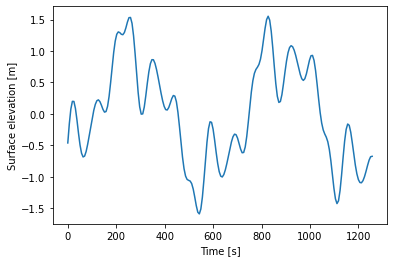

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Let us construct an array of wave amplitudes just by picking numbers:
Avec = np.array([1.0, 0.4, 0.3, 0.25, 0.1])

N = len(Avec)

# Corresponding array of wave frequencies linearly spaced between 0.01 [rad/s] and 0.1 [rad/s] with same length as A_vec:
omgvec = np.linspace(0.01,0.1, N)

# We also need an array of arbitrary phase angles. Instead of picking numbers, we will make use of numpy's random function which returns an arbitrary number
# in the range from 0 to 1. We want the phase angle to be in the range from 0 to 2*pi.
epsvec = np.random.rand(N)*(2.*np.pi)

Tmax = 2*np.pi/np.min(omgvec) # The largest wave period correspond to the smallest wave frequency.

# Now construct a time vector of 200 samples for realization of the sum of wave components:
tvec = np.linspace(0, 2*Tmax, 200)

# Initialize zeta(t)
zeta = np.zeros_like(tvec) # Create an array of zeros with the same shape as the tvec array
for (A, omg, eps) in zip(Avec, omgvec, epsvec): # we use the zip-keyword to combine the three arrays as an (Nx3) array/list and loop over the N number of wave compononents
    zeta += A*np.cos(omg*tvec+eps) # Add each wave component to zeta(t)

# To construct an array of arbitrary numbers
plt.figure()
plt.plot(tvec, zeta)
plt.xlabel('Time [s]')
plt.ylabel('Surface elevation [m]')


Now, the resulting irregular wave profile might not look so realistic. This is because we used few wave components and picked the componentvise amplitudes and frequencies by chance. The so-called Fourier theorem in mathematics states that one can represent any continuous, periodic function as a weighted sum of sine and cosine wave components. Hence, it is possible to express an irregular sea surface as a weighted sum of sine and cosine wave components (or sum of sine or cosine components with an arbitrary phase angle). 
Empirical investigations of real sea-states have shown that the energy distribution of irregular waves over wave frequencies follow some specific behavior. We remember that the enery of a regular wave is $$\frac{E}{\lambda}=\frac{1}{2}\rho g\zeta_a^2$$. By use of a mathematical technique called Fourier transform, it is possible to decompose irregular waves into regular wave components and obtain the wave amplitude and hence the energy content corresponding to each regular wave component. The distribution of wave energy over a range of wave frequencies, or regular wave components, is known as a wave spectrum, typically denoted $S(\omega)$. A wave spectrum for a given sea-state can be obtained directly from processing of field measurements, however, this will only represent the measured seastate at the given location. Based on studies of a large amount of field measurements, generalized wave spectra determined by a set of wave parameters have been developed. These are convenient to use in design of marine structures. Typical input parameters are mean wave period and significant wave height.
*Significant wave height* denoted $H_{1/3}$ is defined as the mean of the 1/3 largest waves. If one measure the height of all waves in a given seastate and sort them in ascending order. Then one take the average of the largest 1/3 of all the waves. There are several ways to represent a mean wave period, e.g. as time between wave peaks (crests) or time between zero up-crossings of the wave profile. 
The spectral amplitude is defined as wave energy per wave length divided by water density and gravity acceleration $S=\frac{E'}{\rho g}$, which means when we insert the expression for wave energy $S=\frac{1}{2}\zeta_a^2$.

## Design wave spectrum - the Pierson-Moskowitz spectrum
The Pierson-Moskowitz (PM-) spectrum represent a class of wave spectra for a fully developed seastate. This means that the wind have lasted for a sufficiently long time, and that the waves have had a sufficiantly long distance to travel in open sea, such that the wave parameters describing the seastate (like the significant wave height and mean wave period) have reached a stationary condition. The PM wave spectrum describing the energy distribution $S$ over wave frequencies $\omega$ is defined as
$$\frac{S(\omega)}{H_{1/3}^2T_{m02}}=\frac{1}{8\pi^2}\left(\frac{\omega T_{m02}}{2\pi}\right)^{-5}\exp\left[-\frac{1}{\pi}\left(\frac{\omega T_{m02}}{2\pi}\right)^{-4}\right]$$
where $T_{m02}$ is the mean zero-crossing period. The zero-crossing period of a wave is the time between two subsequent upcrossings of the free surface at $z=0$.

Let us have a look at the PW wave spectrum. First we need to implement the definition of the Pierson-Moskowitz spectrum. It is convenient to define it as a function.


In [23]:
# We define the wave spectrum as a function of omega taking H1d3 and Tm02 as input parameters
def pierson_moskowitz(omega, H1d3, Tm02):
    '''
    This function computes the Pierson-Moskowitz wave spectrum for given frequenies, with significant wave height and mean zero-crossing period as input parameters.
    Input:
        omega: [rad/s] Wave frequency to compute spectral value
        H1d3 : [m] Significant wave height
        Tm02 : [s] Mean zero-crossing period
    
    Return:
        S : [m^2s] Spectral amplitude for given input frequency
    '''

    # Definition of PM wave spectrum:
    S = H1d3**2*Tm02*(1./(8.*np.pi**2))*(omega*Tm02/(2*np.pi))**(-5)*np.exp(-1./np.pi*(omega*Tm02/(2*np.pi))**(-4))
    
    return S


Text(0, 0.5, '$S(\\omega)$')

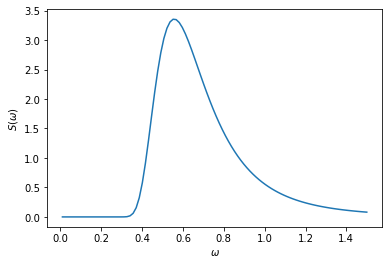

In [109]:
# Now let us have a look at the spectrum for a seastate defined by
H1d3 = 4.57 #14.6 # [m]
Tm02 = 8.01 #12.0 # [s]

# First we define a frequency array from 0.01 rad/s to 1 rad/s:
omgvec = np.linspace(0.01, 1.5, 100)

Svec = pierson_moskowitz(omgvec, H1d3, Tm02)

plt.figure()
plt.plot(omgvec, Svec)
plt.xlabel(r'$\omega$') # the 'r' inside the argument states that the following text string should be interpreted as 'raw' text. This is necessary for processing 'latex' typesetting languated.
plt.ylabel(r'$S(\omega)$')

Looking at the above spectrum, we see that the energy of the given seastate is mainly distributed around $\omega\approx 0.4$. The spectrum shows that the energy content for very low frequencies (long wave period) is zero and also that the energy content for high frequencies approach zero. The total area under the spectrum represents the total energy in the seastate. The energy associated with a given wave frequency $\omega_1$ (and its immediate neigbourhood of width $\mathrm{d}\omega$) is $S(\omega_1)\mathrm{d}\omega$, i.e. an area element of the wave spectrum. This means $S(\omega_1)\mathrm{d}\omega=\frac{1}{2}(\zeta_a(\omega_1))^2$. We will now use this relation to make a time realization of the given seastate.

## Time realization of irregular waves from a wave spectrum
Imagine that we divide the above wave spectrum into a finite number $N$ of vertical slices, where each slice has width $\Delta\omega$ and height $S(\omega)$. For the spectrum above, we see that we can disregard frequencies below $\omega_{min}\approx 0.2$ and above $\omega_{max}\approx 1.5$. Now we divide the frequency range $\omega_{max}-\omega_{min}$ into $N$ intervals $\Delta\omega$, each representing a regular wave component. The wave amplitude corresponding to each frequency in this range is then obtained as
$$A_i=\sqrt{2S(\omega_i)\Delta\omega}$$
Let us make a time realization of this seastate

Text(0, 0.5, 'Surface elevation [m]')

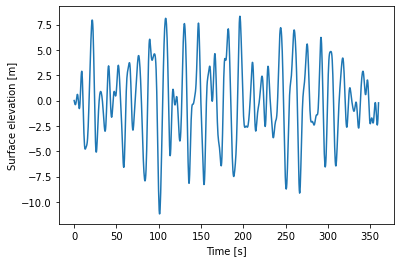

In [28]:
N = 100        # [-] Number of wave (frequency) components
omg_min = 0.2 # [rad/s] Lower frequency limit
omg_max = 1.5 # [rad/s] Upper frequency limit


# Compute delta omega (width of frequency interval representing each wave component)
domg = (omg_max-omg_min)/float(N)

# Create array of wave frequencies dividing the given range into elements of width domg
omgvec = np.arange(omg_min, omg_max, domg)

# Now we have an array of length N+1 representing the frequencies separating the slices (i.e. at the slice location)
# We want to use the frequency corresponding to the center of each slice to represent each wave component
omgCvec = omgvec[:-1] + 0.5*np.diff(omgvec) # The expression omgvec[:-1] means we take all elements of the array, up to the second last one (we go one step back from the end of the array)

# The wave spectrum evaluated at these frequencies are
Svec = pierson_moskowitz(omgCvec, H1d3, Tm02)

# Compute corresponding wave amplitudes
Avec = np.sqrt(2.0*Svec*domg)

# Random phase angles between 0 and 2*pi:
epsvec = np.random.rand(N)*2.0*np.pi

# We want to look at the waves during a 6 minute time period:
tvec2 = np.linspace(0,6*60,1000)

# Compute resulting surface elevation by sum over wave components:
zeta = np.zeros_like(tvec2) # Create an array of zeros with the same shape as the tvec array
for (A, omg, eps) in zip(Avec, omgCvec, epsvec): # we use the zip-keyword to combine the three arrays as an (Nx3) array/list and loop over the N number of wave compononents
    zeta += A*np.cos(omg*tvec2+eps) # Add each wave component to zeta(t)
    
# To construct an array of arbitrary numbers
plt.figure()
plt.plot(tvec2, zeta)
plt.xlabel('Time [s]')
plt.ylabel('Surface elevation [m]')

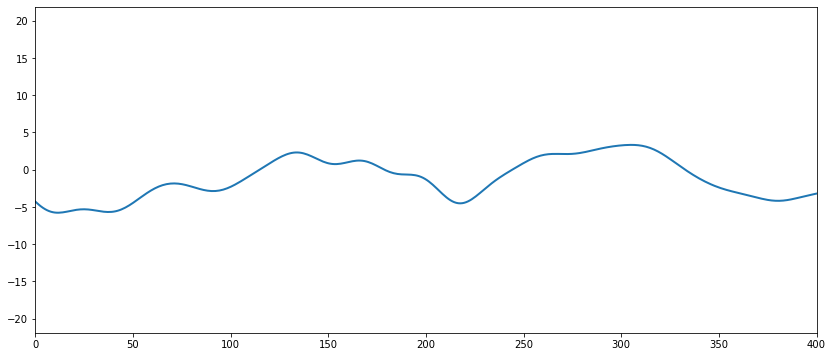

In [46]:
# Let us animate the time series of waves over some length along the x-axis
# Then we need to import some packages for the animation
from matplotlib import animation, rc      # Library for making animations
from IPython.display import HTML          # Library to embed animation in html

# Construct arrays for points on x-axis and time-steps
xvec = np.linspace(0, 400, 400) # Create an array with values linearly spaced from 0 to 100, with 200 elements.
tvec = np.linspace(0, 60, 100)  # Array of equally spaced time instants for evaluation of the wave profile

g = 9.81 # [m/s^2] Gravity acceleration

Nx = len(xvec)
Nt = len(tvec)

# Compute resulting surface elevation by sum over wave components:
zeta = np.zeros((Nt, Nx)) # Create an array of zeros with the same shape as the tvec array
for n, tn in enumerate(tvec):
    for (A, omg, eps) in zip(Avec, omgCvec, epsvec): # we use the zip-keyword to combine the three arrays as an (Nx3) array/list and loop over the N number of wave compononents
        k = omg**2/g # Dispersion relation for deep water waves to obtain k corresponding to given omega
        zeta[n,:] += A*np.cos(omg*tn-k*xvec+eps) # Add each wave component to zeta(t)


# Create grid for sub-figures:
fig = plt.figure(figsize=(14,6))

plt.xlim((xvec[0], xvec[-1]))
plt.ylim((-1.5*H1d3, 1.5*H1d3))


#  Create animation
line, = plt.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(i):
    line.set_data(xvec, zeta[i,:])
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(tvec), interval=200, blit=True)

HTML(anim.to_html5_video())

## Stochastic analysis of response
### Rayleigh distribution
We assume that the peak values of the response follow a Rayleigh distribution. The probability density function of a Rayleigh distribution of a stochastic variable $x$ is
$$f(x;\sigma)=\frac{x}{\sigma^2}\mathrm{e}^{-\frac{x^2}{2\sigma^2}}$$
where $\sigma$ is a scale parameter. If we consider the heave response amplitude $\eta_{3a}$ as our stochastic variable $x$, then the probability density function express the probability that the heave response take a given value $\eta_{3a}$. The cumulative probability distribution function $F(x<X;\sigma)$ expresses the probability that our stochastic variable $x$ is below some given value $X$. For a Rayleigh distribution, the cumulative probability distribution function is
$$F(x<X;\sigma)=1-\mathrm{e}^{-\frac{x^2}{2\sigma^2}}$$
Let us implement these expressions and take a look.

### Response spectrum

In [52]:
# Rayleigh distribution

def rayleigh_pdf(x,sigma):
    '''
    Compute the probability density function from a Rayleigh distribution of the stochastic variable 'x'
    Input:
    x    : Stochastic variable
    sigma: Shape parameter
    
    Return
    f : Probability density
    '''
    f = x/sigma**2*np.exp(-x**2/(2.0*sigma**2))
    return f

def rayleigh_cdf(x,sigma):
    '''
    Compute the cumulative distribution function for a Rayleigh distribution of the stochastic variable 'x'
    Input:
    x    : Stochastic variable
    sigma: Shape parameter
    
    Return
    cdf : cumulative probability
    '''
    cdf = 1.0 - np.exp(-x**2/(2.0*sigma**2))
    return cdf
    


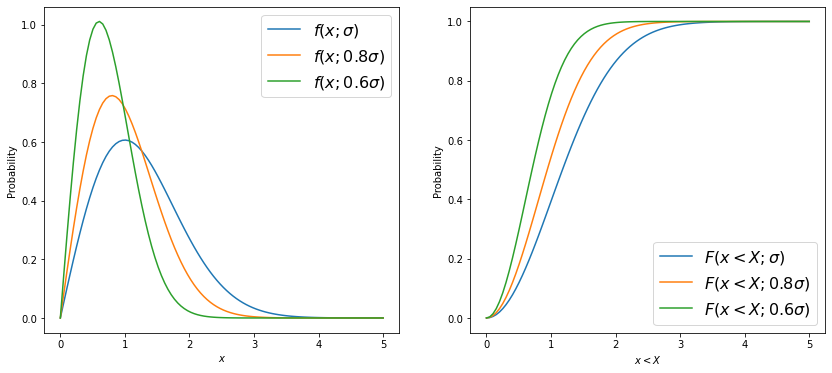

In [57]:
# Let us have a look at these distributions using normalized values of the shape parameter sigma and stochastic variable x:

from matplotlib import gridspec

sigma = 1.0 #
xvec = np.linspace(0, 5*sigma, 100)

# Plot results
gs = gridspec.GridSpec(nrows=1, ncols=2)
fig = plt.figure(figsize=(14,6))

# Plot surface elevation:
ax1 = fig.add_subplot(gs[0,0])
ax1.plot(xvec, rayleigh_pdf(xvec, sigma), label=r'$f(x;\sigma)$')
ax1.plot(xvec, rayleigh_pdf(xvec, 0.8*sigma), label=r'$f(x;0.8\sigma)$')
ax1.plot(xvec, rayleigh_pdf(xvec, 0.6*sigma), label=r'$f(x;0.6\sigma)$')
ax1.set_xlabel(r'$x$')
ax1.set_ylabel('Probability')
#ax1.set_ylim(ymax=2, ymin=0)
ax1.legend(fontsize=16)

ax2 = fig.add_subplot(gs[0,1])
ax2.plot(xvec, rayleigh_cdf(xvec, sigma), label=r'$F(x<X;\sigma)$')
ax2.plot(xvec, rayleigh_cdf(xvec, 0.8*sigma), label=r'$F(x<X;0.8\sigma)$')
ax2.plot(xvec, rayleigh_cdf(xvec, 0.6*sigma), label=r'$F(x<X;0.6\sigma)$')
ax2.set_xlabel(r'$x<X$')
ax2.set_ylabel('Probability')
#ax2.set_ylim(ymax=2, ymin=0)
#ax2.set_xlim(xmax=40, xmin=0)
ax2.legend(fontsize=16)

### Most probable largest values
Typically, in response analysis, we are after the probability of *exceeding* some limit of response. The probability of exceedance can be found from the cumulative probability distribution function as
$$P_{exceedance}(x>X)=1-F(x<X)=\mathrm{e}^{-\frac{x^2}{2\sigma^2}}$$
If we want to find the most probable largest force amplitude $F_{max}$ from $N$ force oscillations, i.e. 1 from $N$ samples, this means we want to find $X$ corresponding to $P(x>X)=1/N$. For a Rayleigh distributed stochastic variable $x$ we get
$$\mathrm{e}^{-\frac{x^2}{2\sigma^2}}=\frac{1}{N}$$
Taking the natural logarithm of the above expression, we obtain
$$\frac{x^2}{2\sigma^2}=\ln{N}$$
And finally, with $x=F_{max}$ and $\sigma=\sigma_{Fx}$, the most probable largest force amplitude from $N$ oscillations is
$$F_{max}=\sqrt{2\sigma_{Fx}^2\ln{N}}$$
where $\sigma_{Fx}$ is the standard deviation of the force amplitude.

### Example: Wave force in irregular sea
Consider again an underwater storage tank at the sea floor as shown below.
<div>
<img src="Figures/tank_on_seabed.PNG" width="600">
</div>
This time, assume the tank diameter is $D=133.2$m, height is $d=36.5$m and water depth is $h=153$m. We want to find the largest horizontal force on the tank during a seastate described by a Pierson-Moskowitz spectrum with significant wave-height $H_{1/3}=14.6$m and average zero upcrossing period $T_{m02}=12$s. Let us have a look at the transfer function for the horizontal excitation force (similarly as we found in Lecture 7). Further, we have been informed that the 100-year wave to be used in design is $H_{100y}=29.6$m.

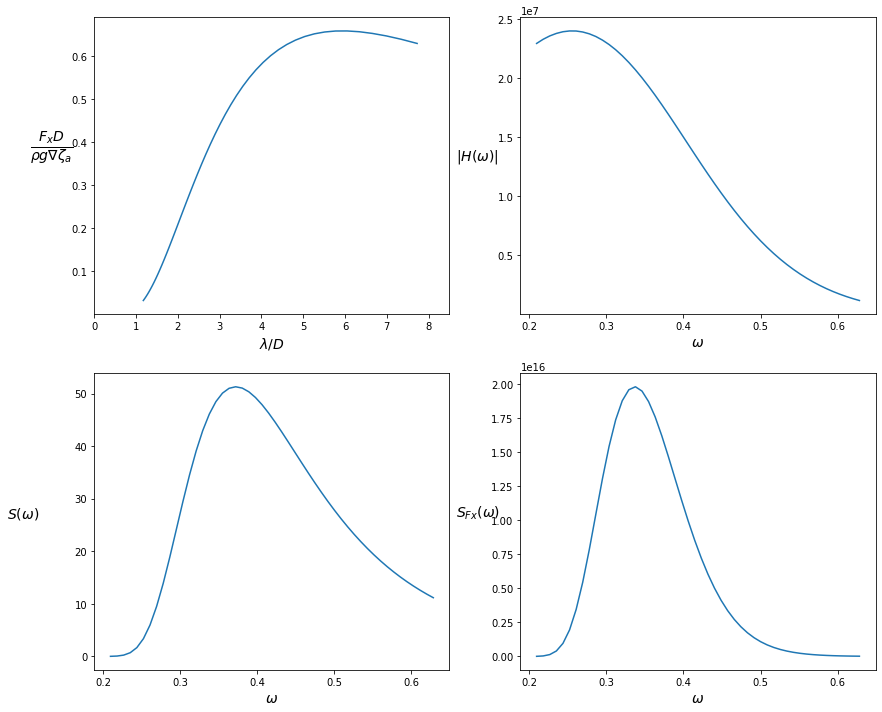

In [90]:
import airywavelib as aw

rho = 1000. # [kg/m^3] Water density
g = 9.81 # [m/s^2] Gravity acceleration

D = 133.2 # [m] Tank diameter
d = 35.5  # [m] Tank height
h = 153.0 # [m] Water depth

zm = -h+0.5*d # [m] vertical position of the volume centre of the tank

nabla = np.pi*(D**2/4.)*d # Displacement
A11 = rho*nabla*d/(2*h-d) # Surge added mass


def excitationforce_x_tf(omega):
    '''
    Compute horizontal wave excitation force for unit wave amplitude (transfer function for F1_ex)
    '''
    # Find wave number corresponding to given frequency and water depth
    k = aw.findWaveNumber(omega, waterDepth=h)
    
    # Compute particle acceleration amplitude at volume center of tank
    ax = omega**2*np.cosh(k*(zm+h))/np.sinh(k*h)
    fk = rho*nabla*ax # Froude-Kriloff force in x-dir using long wave theory
    fdiff = A11*ax    # Diffraction force in x-dir. using long wave theory
    return fk+fdiff   # Total wave excitation force


Tm02 = 12.0 # [s] Mean zero-upcrossing period
H1d3 = 14.6 # [m] Significant wave height

nondimfreq = np.linspace(0.4, 1.2, 50) # Non-dimensional wave frequency array omega*Tm02/(2*pi)
omgvec = nondimfreq*2.0*np.pi/Tm02

# The wave spectrum based on Pierson-Moskowitz spectrum
Svec = pierson_moskowitz(omgvec, H1d3, Tm02)

# Below we make use of an efficient technique in python to build arrays, so-called list comprehensions e.g. [x for x in range(5)] will return the list [0,1,2,3,4]
# To make it a numpy array for which we can use vector operations, we wrap our list with np.array(), i.e. np.array([x for x in range(5)])
kvec = np.array([aw.findWaveNumber(omg, waterDepth=h) for omg in omgvec]) # Let us construct an array with wave numbers corresponding to our frequency array
F1ex = np.array([excitationforce_x_tf(omg) for omg in omgvec]) # Next we construct an array of corresponding wave excitation force Fx

lvec = 2*np.pi/kvec # Corresponding array of wave lengths


gs = gridspec.GridSpec(nrows=2, ncols=2)

fig = plt.figure(figsize=(14,12))
ax1 = fig.add_subplot(gs[0,0])
ax1.plot(lvec/D, F1ex*D/(rho*g*nabla))
ax1.set_xlabel(r'$\lambda/D$', fontsize=14)
ax1.set_ylabel(r'$\frac{F_xD}{\rho g\nabla\zeta_a}$', rotation=0, fontsize=20)
ax1.yaxis.set_label_coords(-0.12, 0.5) # Adjust position of y-axis label
ax1.set_xlim(xmin=0, xmax=8.5)

ax2 = fig.add_subplot(gs[0,1])
ax2.plot(omgvec, F1ex)
ax2.set_xlabel(r'$\omega$', fontsize=14)
ax2.set_ylabel(r'$|H(\omega)|$', rotation=0, fontsize=14)
ax2.yaxis.set_label_coords(-0.12, 0.5) # Adjust position of y-axis label

ax3 = fig.add_subplot(gs[1,0])
ax3.plot(omgvec, Svec)
ax3.set_xlabel(r'$\omega$', fontsize=14)
ax3.set_ylabel(r'$S(\omega)$', rotation=0, fontsize=14)
ax3.yaxis.set_label_coords(-0.2, 0.5) # Adjust position of y-axis label

ax4 = fig.add_subplot(gs[1,1])
ax4.plot(omgvec, (F1ex)**2*Svec)
ax4.set_xlabel(r'$\omega$', fontsize=14)
ax4.set_ylabel(r'$S_{Fx}(\omega)$', rotation=0, fontsize=14)
ax4.yaxis.set_label_coords(-0.12, 0.5) # Adjust position of y-axis label

#ax2.set_xlim(xmin=0, xmax=1.5)

The upper left figure is the non-dimensional transfer function, while the upper right shows the transfer function $|H(\omega)|=|F1_{ex}/\zeta_a|$ with dimensions.
The lower left figure is the Pierson-Moskowitz wave spectrum with $H_{1/3}=14.6$m and $T_{m02}=12$s. Finally, the lower right figure shows the response spectrum $S_{Fx}(\omega)=|H(\omega)|^2S(\omega)$. 

### Design specter method
In order to compute the most probable largest force during the seastate, given as
$$F_{max}=\sqrt{2\sigma_{Fx}^2\ln(N)}$$
we need to find the standard deviation of the force amplitude $$\sigma_{Fx}=\sqrt{\int_0^{\infty}S_{Fx}(\omega)\mathrm{d}\omega}$$ and the number of force amplitudes $N$ during the seastate. The variance $\sigma_{Fx}^2$ is found as the area under the response spectrum. We approximate the integral as
$$\int_0^{\infty}S_{Fx}(\omega)\mathrm{d}\omega\approx\sum_{n=1}^N S_{Fx}(\omega_n)\Delta\omega$$

In [94]:
# delta omega
domega = omgvec[1]-omgvec[0]

# Response spectrum:
S_fx = (F1ex**2)*Svec

# Approximate integral:
variance = np.sum(S_fx*domega)
sigmaFx = np.sqrt(variance)
print('Standard dev.: sigma_fx = {:.2f} MN'.format(sigmaFx*1e-6)) # We multiply by 10^-6 to get units of MN (Mega Newton)

Standard dev.: sigma_fx = 50.86 MN


Next, we need to find the number of oscillation periods $N$. We assume the wave heights are Rayleigh distributed. Then we can use the expression for the most probable largest wave as $$H_{max}=\sqrt{2\sigma_H^2\ln(N)}$$, where the standard deviation of the wave heights is found from the wave spectrum as two times the standard deviation of the wave amplitudes $$\sigma_H = 2\sigma_{\zeta_a}=2\sqrt{\int_0^{\infty}S(\omega)\mathrm{d}\omega}$$. Further, the significant waveheight $H_s$ can be estimated from the wave spectrum as $$H_{1/3}=4\sqrt{m_0}$$ where $$m_0=\int_0^{\infty}\omega^0S(\omega)\mathrm{d}\omega=\int_0^{\infty}S(\omega)\mathrm{d}\omega$$ is the zeroth moment of the wave spectrum. Putting this together, we obtain $$H_{max}=H_{1/3}\sqrt{\frac{1}{2}\ln(N)}$$ from which we get an estimate of $N$ as
$$N=\exp\left[2\left(\frac{H_{max}}{H_{1/3}}\right)^2\right]$$


In [107]:
# We insert the numbers to obtain an estimate of N:
H100y = 29.6 # [m] 100-year wave, which we use as Hmax
H1d3 = 14.6 # [m] Significant wave height

N = int(np.exp(2.0*(H100y/H1d3)**2)) # We cast the result to an integer using int()

duration = N*Tm02 # Time duration of the sea-state

print("Wave height ratio: Hmax/H1d3={:f}".format(H100y/H1d3))
print("Number of wave periods: N={}".format(N))
print("Duration: t={} h".format(duration/3600.))

# The most probable largest excitation force in x-dir is then:
Fmax = np.sqrt(2*sigmaFx**2*np.log(N))
print("Most probable largest force, design specter method: Fmax={:.1f} MN".format(Fmax*1e-6))

Wave height ratio: Hmax/H1d3=2.027397
Number of wave periods: N=3717
Duration: t=12.39 h
Most probable largest force, design specter method: Fmax=206.2 MN


### Design wave method
A more simple approach is to use the so-called design wave method to estimate the extreme force. Then we consider the 100-year wave as a regular wave and compute the corresponding regular wave force. Let us assume the wave period corresponding to the 100-year wave is $T=17$ s, and use our transfer function to estimate the force.

In [108]:
# Design wave method, using 100-year wave as the design wave:
zetaA = 0.5*H100y # [m] Design wave amplitude
T = 17.0 # [s] Design wave period

# Compute wave frequency
omega = 2.0*np.pi/T

# Use our transfer function to obtain the wave excitation force:
Fmax2 = zetaA * excitationforce_x_tf(omega)

print("Most probable largest force, design wave method: Fmax={:.1f} MN".format(Fmax2*1e-6))

Most probable largest force, design wave method: Fmax=266.1 MN


## Example: Heave response of a semi-submercible platform
We revisit the platform from last lecture. Now, we want to examine the most probable heave response in an irregular sea-state described by a Pierson-Moskowitz spectrum with $H_{1/3}=4.57$m and $T_{m02}=8.01$s.
<div>
<img src="Figures/semisub_sideview.PNG" width="400">
</div>
<div>
<img src="Figures/semisub_frontview.PNG" width="400"><img src="Figures/semisub_dimensions.PNG" width="200">
</div>

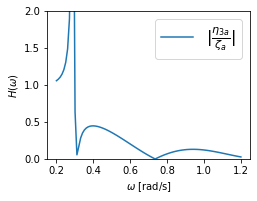

In [116]:
# We start out with estimating the added mass:

rho = 1000. # [kg/m^3] Water density
B2 = 11.0   # [m] Cross-section width
D2 = 7.0    # [m] Cross-section height
L = 100.    # [m] Pontoon length
Cm = 1.75   # [-] Added mass coefficient from Fig. 3-23 for given L/D=D2/B2

# Volume displacement of pontoons:
Vp = 2*(D2*B2*L)

# Added mass of pontoons:
A33p = Cm*rho*Vp

zetaA=1. # [m]
g = 9.81 # [m/s^2]
D1 = 15. # [m]
L2 = 7.0 # [m]
L4 = 9.0 # [m]
B = 57.0 # [m]

zt = -D1
zm = -(D1+0.5*D2)

# Waterplane area = intersection area on pontoon top
Aw = 2.0*np.pi*(2*(L2/2.)**2 + 2*(L4/2.)**2)

# Restoring coefficient:
C33 = rho*g*Aw

# Displacement by columns (legs of platform)
Vc = Aw*D1

# Total mass of the structure
M = rho*(Vp + Vc)


# Deep water dispersion relation
k = lambda omega: omega**2/g

# Excitation force amplitude in heave
def heave_transferfunc(omega):

    # Excitation force
    F3ex = -omega**2*zetaA*np.exp(k(omega)*zm)*(rho*Vp + A33p)*np.cos(k(omega)*B/2.)

    # Correction due to columns:
    F3corr = -rho*g*zetaA*np.exp(k(omega)*zt)*Aw*np.cos(k(omega)*B/2.)

    # Resulting heave excitation force
    F3eAtot = F3ex - F3corr

    # Transfer function for heave motion
    H_eta3a = np.abs(F3eAtot/(-omega**2*(M+A33p) + C33))

    return H_eta3a
    


When we have the transfer function $|H_{\eta_{3a}}(\omega)|$ and the wave spectrum $S(\omega)$, we find the response spectrum of the heave motion as
$$S_{\eta_{3a}}=|H_{\eta_{3a}}(\omega)|^2 S(\omega)$$
Let us have a look.

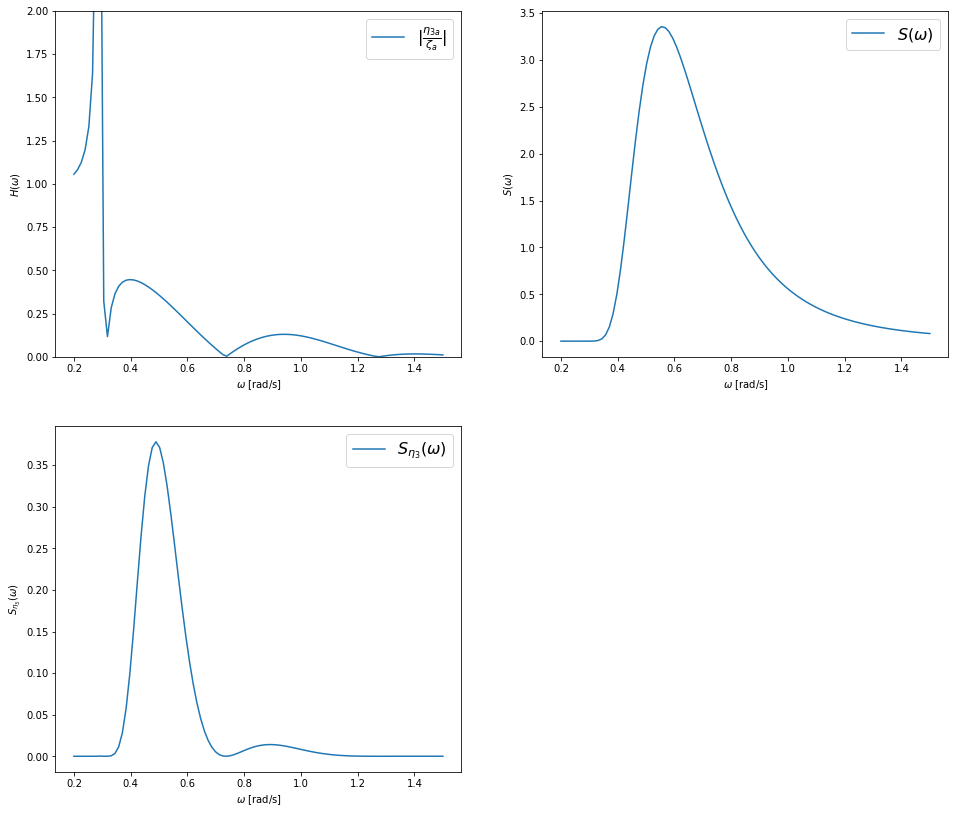

In [131]:
# Design sea-state
H1d3 = 4.57 # [m] Significant wave height
Tm02 = 8.01 # [s] Mean zero-upcrossing period

# Create a frequency array
omgvec = np.linspace(0.2,1.5,100)

# Compute transfer function
H_eta3 = np.array([heave_transferfunc(omg) for omg in omgvec])

# Compute wave spectrum
Svec = pierson_moskowitz(omgvec, H1d3, Tm02)

# Compute response spectrum
S_eta3 = (H_eta3**2)*Svec


gs = gridspec.GridSpec(nrows=2, ncols=2)

# Plot transfer function:
fig = plt.figure(figsize=(16,14))
ax1 = fig.add_subplot(gs[0,0])
ax1.plot(omgvec, H_eta3, label=r'$|\frac{\eta_{3a}}{\zeta_a}|$')
ax1.set_xlabel(r'$\omega$ [rad/s]')
ax1.set_ylabel(r'$H(\omega)$')
ax1.set_ylim(ymax=2, ymin=0)
ax1.legend(fontsize=16)

ax2 = fig.add_subplot(gs[0,1])
ax2.plot(omgvec, Svec, label=r'$S(\omega)$')
ax2.set_xlabel(r'$\omega$ [rad/s]')
ax2.set_ylabel(r'$S(\omega)$')
#ax2.set_ylim(ymax=2, ymin=0)
ax2.legend(fontsize=16)

ax3 = fig.add_subplot(gs[1,0])
ax3.plot(omgvec, S_eta3, label=r'$S_{\eta_3}(\omega)$')
ax3.set_xlabel(r'$\omega$ [rad/s]')
ax3.set_ylabel(r'$S_{\eta_3}(\omega)$')
#ax3.set_ylim(ymax=2, ymin=0)
ax3.legend(fontsize=16)

Finally, we can compute the most probable largest response amplitude in heave. We choose to consider the most probable maximum during $N=1000$ cycles.

In [132]:
# Load cycles:
N=1000

print("Time period for evaluation: t={} hours".format(N*Tm02/3600.))

# Approximate variance of response spectrum S_eta3:
domega = omgvec[1]-omgvec[0] # delta omega
variance = np.sum(S_eta3*domega) # Approximate integral of response spectrum
sigma_eta3 = np.sqrt(variance)
print("Std.dev.: sigma_eta3={:.02f} m".format(sigma_eta3))

# Most probable largest heave amplitude:
eta_3max = np.sqrt(2*sigma_eta3**2*np.log(N))

print("Most probable largest heave amplitude, design specter method: eta3a_max={:.2f} m".format(eta_3max))

Time period for evaluation: t=2.225 hours
Std.dev.: sigma_eta3=0.26
Most probable largest heave amplitude, design specter method: eta3a_max=0.95 m


Let us check the accuracy of our numerical integration of the spectrum, by looking at the wave spectrum. The significant wave height can be expresse as
$$H_{1/3}=4\sqrt{m_0}=4\sqrt{\int_0^{\infty}S(\omega)\mathrm{d}\omega}$$
Approximating the integral as
$$\int_0^{\infty} S(\omega)\mathrm{d}\omega\approx\sum_{i=1}^{I}S(\omega_i)\Delta\omega$$
using $I=100$, we obtain

In [130]:
# Approximate the zero^th moment of the wave spectrum:
m0 = np.sum(Svec*domega)

# Compute significant wave height based on spectrum:
Hm0 = 4*np.sqrt(m0)

# Compare with given value:
print("Hm0/H1d3={:.3f}".format(Hm0/H1d3))


Hm0/H1d3=0.985
